In [38]:
#Importing neccesarry libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [39]:
df = pd.read_csv("/content/car.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
1,18,8,307,130,3504,12,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11,70,1
4,16,8,304,150,3433,12,70,1


<h1> Data Cleaning<h1>

Converting 1st row to header as we can see from above that 1st row contains the header of our csv file

In [40]:

df.columns = df.iloc[0]
df = df[1:]
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
1,18,8,307,130,3504,12,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11,70,1
4,16,8,304,150,3433,12,70,1
5,17,8,302,140,3449,10.5,70,1


In [41]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398,398,398,398,398,398,398,398
unique,129,5,82,94,351,95,13,2
top,13,4,97,150,1985,14.5,73,1
freq,20,204,21,22,4,23,40,249


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 1 to 398
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MPG           398 non-null    object
 1   Cylinders     398 non-null    object
 2   Displacement  398 non-null    object
 3   Horsepower    398 non-null    object
 4   Weight        398 non-null    object
 5   Acceleration  398 non-null    object
 6   Model Year    398 non-null    object
 7   US Made       398 non-null    object
dtypes: object(8)
memory usage: 25.0+ KB


We can see from above that all of the columns have object datatypes, but the data in the columns is numeric, thus we will alter the datatypes of the columns to numeric

In [43]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
1,18.0,8,307.0,130.0,3504,12.0,70,1
2,15.0,8,350.0,165.0,3693,11.5,70,1
3,18.0,8,318.0,150.0,3436,11.0,70,1
4,16.0,8,304.0,150.0,3433,12.0,70,1
5,17.0,8,302.0,140.0,3449,10.5,70,1


In [44]:
df['Horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 1 to 398
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Checking for the null values

In [46]:
df.isna().sum()

0
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [47]:
print('Percentage of Null values with respect to columns in the dataset')
100* df.isnull().sum()/len(df)

Percentage of Null values with respect to columns in the dataset


0
MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      1.507538
Weight          0.000000
Acceleration    0.000000
Model Year      0.000000
US Made         0.000000
dtype: float64

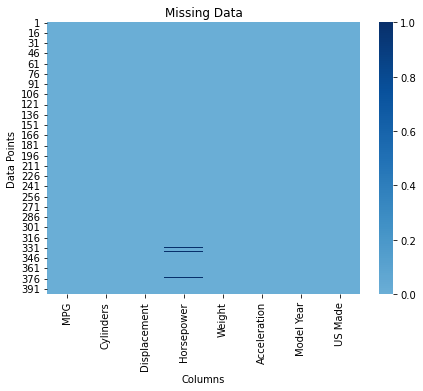

In [48]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.isnull(), ax=ax, cmap="Blues", center=0).set(
            title = 'Missing Data', 
            xlabel = 'Columns', 
            ylabel = 'Data Points');

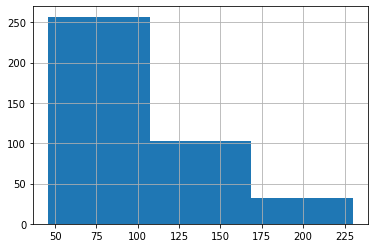

In [49]:
df['Horsepower'].hist(bins=3)

In [50]:
#missing value imputation with horsepower mean
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].mean())

In [51]:
df.isna().sum()

0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

<h1> Descriptive Analysis <h1>

In [52]:
df.describe().round(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01,0.63
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.48
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,0.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,0.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,1.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


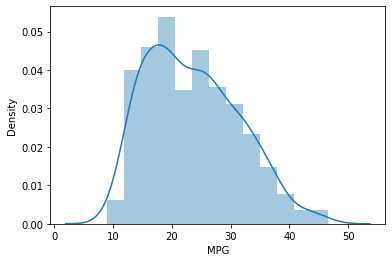

In [53]:
# plot distribution plot to view the distribution of target variable
sns.distplot(df['MPG'])

In [54]:
# Skewness and kurtosis
print("Skewness: %f" %df['MPG'].skew())
print("Kurtosis: %f" %df['MPG'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [55]:
df['US Made'].value_counts()

1    249
0    149
Name: US Made, dtype: int64

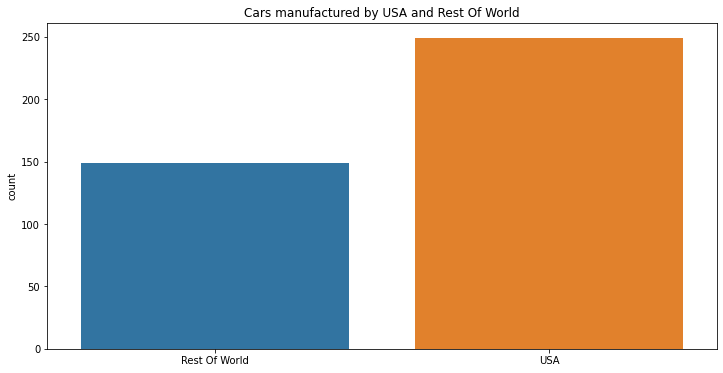

In [56]:
# Car Counts Manufactured by US and Outside of US
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x = df['US Made'].values, data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'USA'
labels[0] = 'Rest Of World'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by USA and Rest Of World")
plt.show()

In [57]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object', name=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

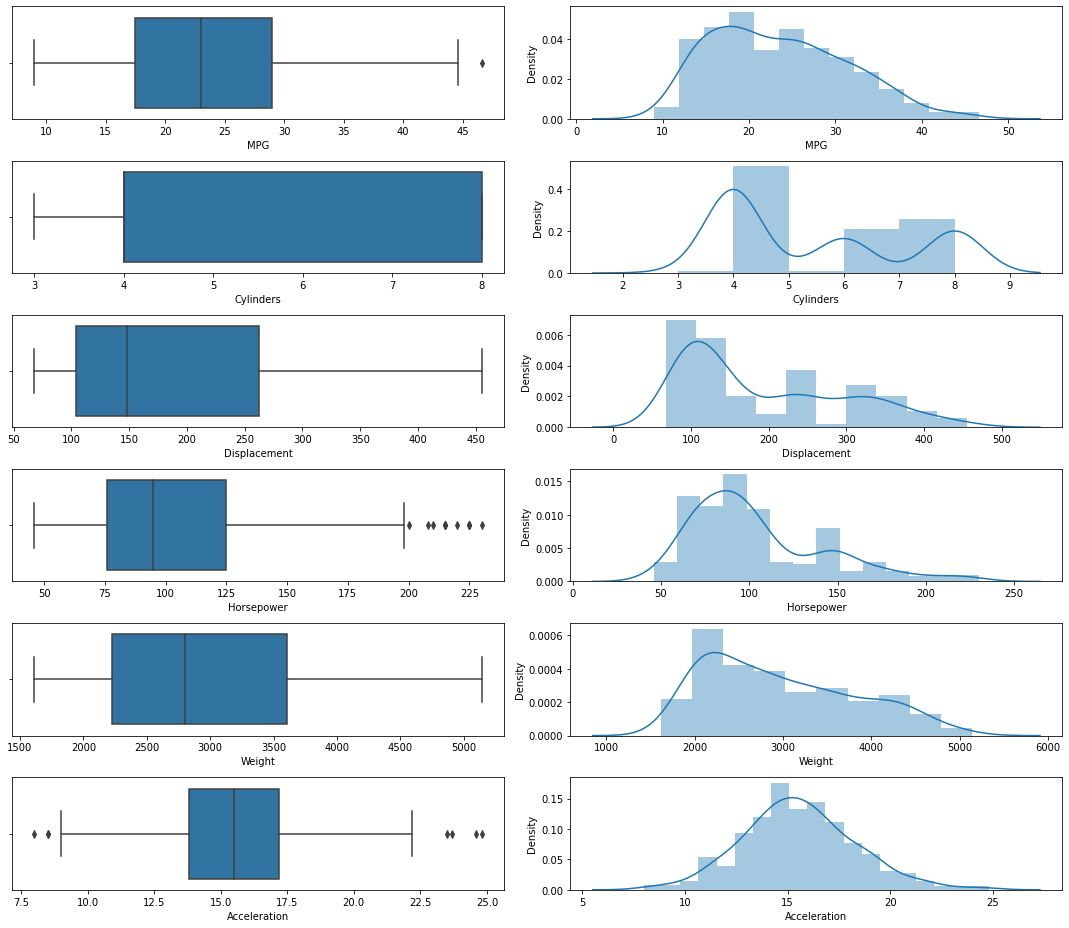

In [58]:
# Exploring the range and distribution of numerical Variables 

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["MPG"], ax = ax[0,0])
sns.distplot(df['MPG'], ax = ax[0,1])

sns.boxplot(x= df["Cylinders"], ax = ax[1,0])
sns.distplot(df['Cylinders'], ax = ax[1,1])

sns.boxplot(x= df["Displacement"], ax = ax[2,0])
sns.distplot(df['Displacement'], ax = ax[2,1])

sns.boxplot(x= df["Horsepower"], ax = ax[3,0])
sns.distplot(df['Horsepower'], ax = ax[3,1])

sns.boxplot(x= df["Weight"], ax = ax[4,0])
sns.distplot(df['Weight'], ax = ax[4,1])

sns.boxplot(x= df["Acceleration"], ax = ax[5,0])
sns.distplot(df['Acceleration'], ax = ax[5,1])

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

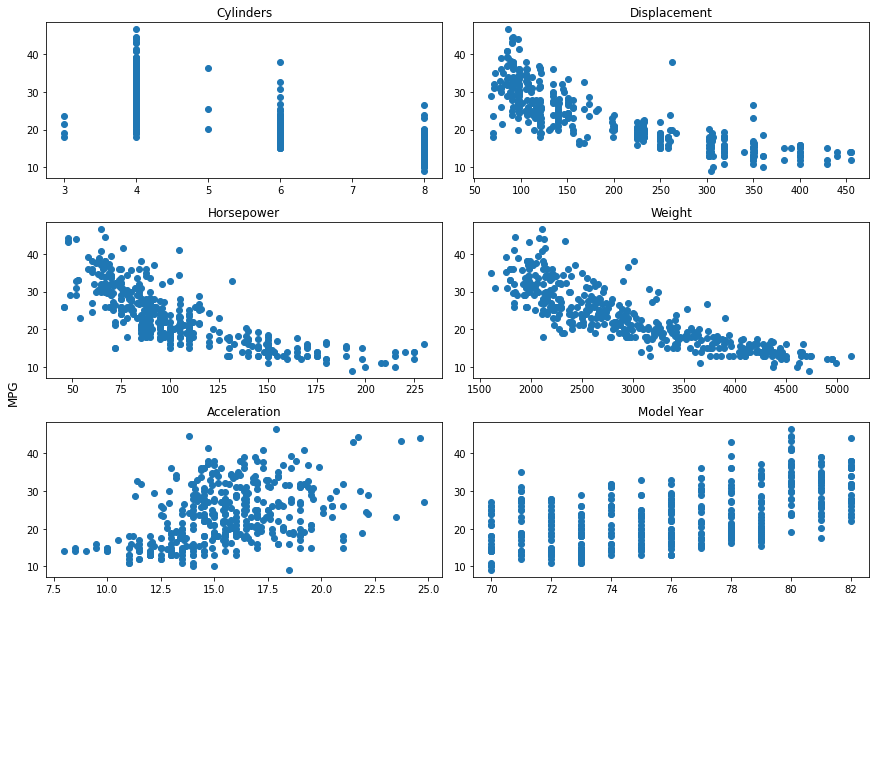

In [59]:
# Plot Numerical Variables 
plt.figure(1)
f,axarr = plt.subplots(4,2, figsize=(12,11))
mpgval = df.MPG.values

axarr[0,0].scatter(df.Cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')

axarr[0,1].scatter(df.Displacement.values, mpgval)
axarr[0,1].set_title('Displacement')

axarr[1,0].scatter(df.Horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')

axarr[1,1].scatter(df.Weight.values, mpgval)
axarr[1,1].set_title('Weight')

axarr[2,0].scatter(df.Acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')

axarr[2,1].scatter(df["Model Year"].values, mpgval)
axarr[2,1].set_title('Model Year')



# Remove the blank plot from the subplots
axarr[3,0].axis("off")
axarr[3,1].axis("off")

f.text(-0.01, 0.5, 'MPG', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

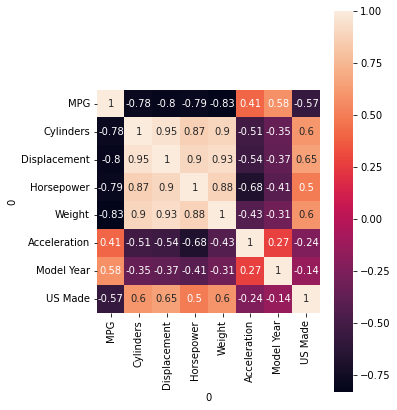

In [75]:
# Correlation between Numerical Features
corr = df.select_dtypes(include=['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(5,7))
sns.heatmap(corr,vmax=1, square=True, annot=True)

So lets find out more information from aove charts

Well nobody manufactures 7 cylinder

4 cylinder engines provide superior mileage performance than other, more commonly made engines.

8-cylinder engines have low mileage, and they're more focused on pickup ( fast cars).

5 cylinder, performance wise, competes none neither 4 cylinder nor 6 cylinder.

Displacement, weight, horsepower are inversely related to mileage.

More horsepower means low mileage.

Manufacturers have focused on enhancing engine economy year after year.


<h1>Feature Engineering<h1>

Treating Outliers in the horsepower and Acceleration Column

In [61]:
df['Horsepower']=df['Horsepower'].clip(lower=df['Horsepower'].quantile(0.05), upper=df['Horsepower'].quantile(0.95))
df['Acceleration']=df['Acceleration'].clip(lower=df['Acceleration'].quantile(0.05), upper=df['Acceleration'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Horsepower')]

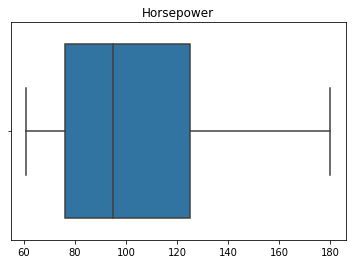

In [62]:
# Using boxplot to see the plot of columns such as Horsepower post treating the outliers 
sns.boxplot(df.Horsepower.values).set(title='Horsepower')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Acceleration')]

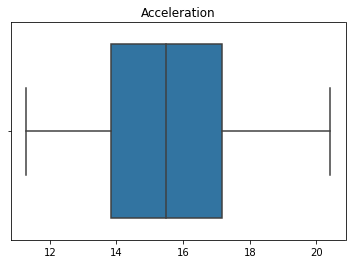

In [63]:
# Using boxplot to see the plot of columns such as Horsepower post treating the outliers 
sns.boxplot(df.Acceleration.values).set(title='Acceleration')

<h1>Model Building<h1>

In [64]:
# lets build our linear model
# independant variables
X = df.drop(['MPG'], axis=1)
# the dependent variable
y = df[['MPG']]

In [65]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(278, 7)
(278, 1)
(120, 7)
(120, 1)


In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('R2 score of Linear Regression Model on train data set is {}'.format(model.score(x_train, y_train)))
print('R2 score of Linear Regression Model on test data set is {}'.format(model.score(x_test, y_test)))

R2 score of Linear Regression Model on train data set is 0.8144949059608576
R2 score of Linear Regression Model on test data set is 0.8463193963585022


In [70]:
#predicting the MPG values based on train set
y_pred = model.predict(x_train)

In [69]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Cylinders is -0.2863757279704176
The coefficient for Displacement is 0.025871244235214697
The coefficient for Horsepower is -0.04044916572752118
The coefficient for Weight is -0.006733572032960537
The coefficient for Acceleration is -0.045908386178236824
The coefficient for Model Year is 0.8191849476304862
The coefficient for US Made is -2.673074080658128


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

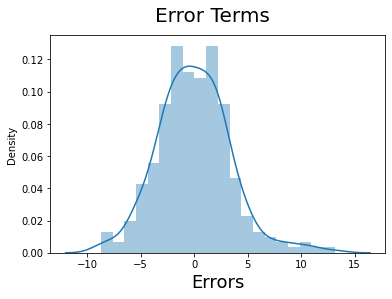

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [72]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)
result = sm.OLS(y_train, x_train_lm).fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.69e-95
Time:                        00:51:39   Log-Likelihood:                -733.92
No. Observations:                 278   AIC:                             1484.
Df Residuals:                     270   BIC:                             1513.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.4818      5.661     -2.735   

MultiCollinearity Values of Features, higher values correspond to higher multicollinearity between variables

In [79]:
#calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

        feature         VIF
0           MPG   56.364952
1     Cylinders  117.817956
2  Displacement   95.826716
3    Horsepower   83.226542
4        Weight  171.314262
5  Acceleration   79.779266
6    Model Year  343.904240
7       US Made    5.511184


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 score of Linear Regression Model on train data set is 0.8097512564043791
R2 score of Linear Regression Model on test data set is 0.8421988468487084
The coefficient for Cylinders is 0.4632377686189603
The coefficient for Horsepower is -0.03728146932637309
The coefficient for Weight is -0.005580755288937901
The coefficient for Acceleration is -0.12474736273030619
The coefficient for Model Year is 0.7920177276966617
The coefficient for US Made is -2.073875524620771
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.38e-94
Time:                        00:51:40   Log-Likelihood:                -737.43
No. Observations:                 278   AIC:            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


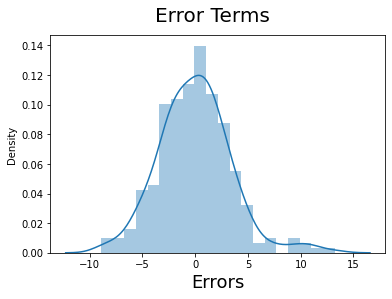

In [74]:
# lets build our linear model
# independant variables
X = df.drop(['MPG','Displacement'], axis=1)
# the dependent variable
y = df[['MPG']]

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)
print('R2 score of Linear Regression Model on train data set is {}'.format(model.score(x_train, y_train)))
print('R2 score of Linear Regression Model on test data set is {}'.format(model.score(x_test, y_test)))


for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

#prediction
y_pred = model.predict(x_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)
result = sm.OLS(y_train, x_train_lm).fit()
print(result.summary())

<h1>Conclusion</h1>


•	Weight, Horsepower, Acceleration, and Cylinders all have an inverse relationship with MPG. That is, as we have seen in the modeling and EDA stages, as these factors increase, the value of MPG decreases.


•	The MPG is proportionate to the model year. MPG value increases as the Model Year value increases. It basically means that as time goes on, new technology will emerge, and we will eventually find a way to build efficient MPG cars.
